# FRAUDES FINANCIEROS: ANÁLISIS CON APRENDIZAJE SUPERVISADO



## I. Introducción

**Metodología de Aprendizaje Supervisado**

Para abordar el problema de la detección de fraudes, se han aplicado varios modelos de aprendizaje supervisado que son ampliamente reconocidos por su eficacia en tareas de clasificación. Los modelos seleccionados para este análisis son:

XGBoost: Un algoritmo de gradient boosting que se ha destacado por su precisión y velocidad en la clasificación. XGBoost es capaz de manejar grandes conjuntos de datos y es resistente al overfitting, lo que lo hace ideal para la detección de fraudes donde las clases pueden estar desbalanceadas.

LightGBM: Similar a XGBoost, LightGBM es un algoritmo de boosting basado en árboles que es extremadamente eficiente en términos de tiempo de entrenamiento y precisión. Su capacidad para manejar grandes cantidades de datos y características lo hace particularmente adecuado para la identificación de fraudes en transacciones financieras.

Regresión Logística: Un modelo estadístico tradicional que se utiliza para predecir la probabilidad de una clase binaria. Aunque es un modelo simple en comparación con otros métodos más avanzados, la regresión logística es útil para proporcionar una interpretación clara de cómo las características individuales afectan la probabilidad de que una transacción sea fraudulenta.

Árbol de Decisión: Un modelo de clasificación que utiliza un enfoque de ramificación basado en las características de los datos. Los árboles de decisión son intuitivos y fáciles de interpretar, lo que los convierte en una opción popular para la detección de fraudes, aunque pueden ser propensos al overfitting si no se controlan adecuadamente.

Random Forest: Random Forest es un algoritmo de aprendizaje automático que combina múltiples árboles de decisión para mejorar la precisión y controlar el sobreajuste. Cada árbol se entrena en un subconjunto diferente del dataset y sus predicciones se combinan para producir una estimación final. Este enfoque de conjunto hace que Random Forest sea robusto frente a los ruidos y variaciones en los datos, proporcionando un rendimiento consistente y preciso.


### Objetivos

* Explorar diferentes técnicas de aprendizaje automático para la clasificación de fraude.

* Optimizar el rendimiento del modelo para lograr alta precisión y eficiencia.



Los modelos seleccionados, como XGBoost, LightGBM, regresión logística, árboles de decisión y Random Forest, han sido elegidos por su capacidad de manejar grandes volúmenes de datos, su resistencia al sobreajuste y su eficacia en la identificación de patrones en datos desbalanceados, como es común en el caso de fraudes. Al evaluar estos modelos, se busca determinar cuál ofrece el mejor equilibrio entre precisión, velocidad de entrenamiento, interpretabilidad y robustez frente a datos ruidosos, con el fin de maximizar la detección de transacciones fraudulentas en un entorno financiero.

In [3]:
#%pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Cargamos las librerías a utilizar

In [38]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import seaborn as sns

# Visualización
# ==============================================================================
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================================================================
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, confusion_matrix, accuracy_score, recall_score, roc_curve
from sklearn.pipeline import Pipeline
import scikitplot as skplt
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
from tabulate import tabulate
from sklearn.metrics import classification_report, precision_score, f1_score, make_scorer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
import shap
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

# Algoritmos de Árboles de Decisión y Random Forest
# ==============================================================================
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

# Entrenamiento de modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Configuración de visualización
# ==============================================================================
%matplotlib inline
sns.color_palette("pastel")
sns.set_palette("pastel")
#sns.set_style("whitegrid")


# Importar las librerías necesarias
from tabulate import tabulate


# ---------- Otras Librerias -------
# from dataprep.eda import create_report, plot, plot_correlation, plot_missing, plot_diff

In [5]:
#from google.colab import drive #importamos
#drive.mount('/content/drive')

## II. Preparación de los Datos

### Carga del Dataset y Exploración Inicial

In [39]:
# Leemos el archivo csv
#df_fraude = pd.read_csv('/content/drive/My Drive/Curso Ingenias/fraud_test.csv', delimiter=',',index_col=0)
df_fraude = pd.read_csv('fraud_test.csv', sep=",")

In [40]:
#Visualizamos el dataframe
df_fraude.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


### Obtención de Información General del Dataset

Se obtiene una visión general del dataset, incluyendo el número de filas, columnas, tipos de datos y si existen valores nulos.

In [8]:
# Obtenemos información general del conjunto de datos
print("\nInformación general del conjunto de datos:")
print(df_fraude.info())


Información general del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float

Se observa el número total de entradas (555,719), el tipo de dato de cada columna y si existen valores nulos.

### Renombramiento de Columnas

Se renombran las columnas del dataset de inglés a español para facilitar su comprensión y manejo.

In [41]:
# Diccionario de mapeo de nombres en inglés a español
columnas_renombradas = {
    'trans_date_trans_time': 'fecha_transaccion',
    'cc_num': 'num_tarjeta',
    'merchant': 'comerciante',
    'category': 'categoria',
    'amt': 'monto',
    'first': 'nombre',
    'last': 'apellido',
    'gender': 'genero',
    'street': 'calle',
    'city': 'ciudad',
    'state': 'estado',
    'zip': 'codigo_postal',
    'lat': 'latitud',
    'long': 'longitud',
    'city_pop': 'poblacion_ciudad',
    'job': 'trabajo',
    'dob': 'fecha_nacimiento',
    'trans_num': 'num_transaccion',
    'unix_time': 'tiempo_unix',
    'merch_lat': 'latitud_comerciante',
    'merch_long': 'longitud_comerciante',
    'is_fraud': 'es_fraude'
}

# Renombramos las columnas
df_fraude.rename(columns=columnas_renombradas, inplace=True)

# Mostramos los nuevos nombres de las columnas
print("Columnas renombradas:", df_fraude.columns)

Columnas renombradas: Index(['Unnamed: 0', 'fecha_transaccion', 'num_tarjeta', 'comerciante',
       'categoria', 'monto', 'nombre', 'apellido', 'genero', 'calle', 'ciudad',
       'estado', 'codigo_postal', 'latitud', 'longitud', 'poblacion_ciudad',
       'trabajo', 'fecha_nacimiento', 'num_transaccion', 'tiempo_unix',
       'latitud_comerciante', 'longitud_comerciante', 'es_fraude'],
      dtype='object')


### Transformación de Fechas y Cálculo de la Edad

In [42]:
# Convertir la columna 'fecha_nacimiento' a tipo datetime
df_fraude['fecha_nacimiento'] = pd.to_datetime(df_fraude['fecha_nacimiento'])

# calcular la edad
df_fraude['edad'] = (2020  - df_fraude['fecha_nacimiento'].dt.year)

## III. Implementación de Modelos de Aprendizaje Automático

### 1_Preparación del Conjunto de Datos para Modelado

In [43]:
# Verificar las columnas disponibles en df_fraude
print("Columnas en df_fraude:", df_fraude.columns)

# Intentar eliminar columnas especificadas
#df_fraude.drop(columns=['calle', 'nombre', 'apellido', 'fraud'], inplace=True, errors='ignore')
df_train = df_fraude.copy()

# Codificación de etiquetas
le = LabelEncoder()
for columna in df_train.columns:
    if df_train[columna].dtype == 'object':
        df_train[columna] = le.fit_transform(df_train[columna])


Columnas en df_fraude: Index(['Unnamed: 0', 'fecha_transaccion', 'num_tarjeta', 'comerciante',
       'categoria', 'monto', 'nombre', 'apellido', 'genero', 'calle', 'ciudad',
       'estado', 'codigo_postal', 'latitud', 'longitud', 'poblacion_ciudad',
       'trabajo', 'fecha_nacimiento', 'num_transaccion', 'tiempo_unix',
       'latitud_comerciante', 'longitud_comerciante', 'es_fraude', 'edad'],
      dtype='object')


In [44]:
# Seleccionar características (X) y la etiqueta (y)
# Definir las columnas que se usarán como características y la etiqueta objetivo
caracteristicas_modelo = ["genero", "trabajo", "categoria", "comerciante", "estado", "edad"]
objetivo = ["es_fraude"]

X = df_train[caracteristicas_modelo] # Caracteristicas
y = df_train[objetivo] # Etiqueta objetivo

#### División del Dataset

El dataset se divide en un conjunto de entrenamiento (70%) y un conjunto de prueba (30%) utilizando train_test_split.

In [45]:
# Construir el modelo
# Dividir el dataset en conjuntos de entrenamiento y prueba
# Divide el conjunto de datos en entrenamiento (70%) y prueba (30%).
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Dividir el dataset en conjuntos de entrenamiento (80%) y prueba (20%)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Se dividió el dataset en conjuntos de entrenamiento y prueba. Se utiliza una división aleatoria, pero si existe un fuerte desbalance de clases, se puede emplear una división estratificada para asegurar que ambas clases (fraudulenta y no fraudulenta) estén proporcionalmente representadas en ambos conjuntos.


**Balanceo de Clases con SMOTE**

Dado el desbalance en las clases de fraude (con muchas menos transacciones fraudulentas que no fraudulentas), se utiliza SMOTE (Synthetic Minority Over-sampling Technique) para generar ejemplos sintéticos de la clase minoritaria. Esto ayuda a entrenar modelos más equilibrados y a evitar el sesgo hacia la clase mayoritaria.


In [46]:
# Aumentar el número de ejemplos de la clase minoritaria para manejar el desbalance de clases
smote = SMOTE(sampling_strategy='auto')
X_train_resampleado, y_train_resampleado = smote.fit_resample(X_train, y_train)
X_train = X_train_resampleado
y_train = y_train_resampleado

#### Normalización de Datos
Se utiliza StandardScaler para estandarizar las características numéricas, ajustándolas a una distribución con media 0 y desviación estándar 1.

In [47]:
escalador = StandardScaler()
X_train = escalador.fit_transform(X_train)
X_test = escalador.transform(X_test)  # Asegurarse de estandarizar también X_test

### 2_Entrenamiento de los Modelos

**Modelo de Resgresión logística**


In [50]:
#Inicializar el modelo
modelo_logistico = LogisticRegression()
# Ajustar el modelo a los datos de entrenamiento balanceados
modelo_logistico.fit(X_train, y_train)
# Predicción
y_pred_logistico = modelo_logistico.predict(X_test)
# Evaluación del modelo logistico
print("\n===== Informe de Evaluación del Modelo =====")
print("Exactitud:", accuracy_score(y_test, y_pred_logistico))
print("ROC AUC:", roc_auc_score(y_test, y_pred_logistico))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_logistico))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_logistico))
print("\nMétricas adicionales:")
print("Precisión:", precision_score(y_test, y_pred_logistico))
print("Recall:", recall_score(y_test, y_pred_logistico))
print("F1-score:", f1_score(y_test, y_pred_logistico))


===== Informe de Evaluación del Modelo =====
Exactitud: 0.5261942465030351
ROC AUC: 0.5006957657939739

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.53      0.69    166076
           1       0.00      0.47      0.01       640

    accuracy                           0.53    166716
   macro avg       0.50      0.50      0.35    166716
weighted avg       0.99      0.53      0.69    166716


Matriz de Confusión:
[[87421 78655]
 [  336   304]]

Métricas adicionales:
Precisión: 0.003850099418685647
Recall: 0.475
F1-score: 0.007638286913152176


La evaluación del modelo de regresión logística indica un rendimiento insatisfactorio, particularmente en lo que respecta a la capacidad de detectar la clase minoritaria (fraude). La baja precisión, recall y F1-score sugieren que el modelo tiene dificultades para identificar correctamente las transacciones fraudulentas. Esto podría deberse a varios factores, como el desbalance de clases o la necesidad de ajustar los hiperparámetros del modelo.

**Modelo de Árbol de decisión**

In [51]:
# Inicialización de árbol de decisión
arbol_decision = DecisionTreeClassifier()
# Entrenar el modelo
arbol_decision.fit(X_train, y_train)
# Predicción
y_pred_arbol = arbol_decision.predict(X_test)
# Evaluación del modelo arbol de decision
print("\n===== Informe de Evaluación del Modelo =====")
print("Exactitud:", accuracy_score(y_test, y_pred_arbol))
print("ROC AUC:", roc_auc_score(y_test, y_pred_arbol))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_arbol))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_arbol))
print("\nMétricas adicionales:")
print("Precisión:", precision_score(y_test, y_pred_arbol))
print("Recall:", recall_score(y_test, y_pred_arbol))
print("F1-score:", f1_score(y_test, y_pred_arbol))


===== Informe de Evaluación del Modelo =====
Exactitud: 0.9901389188800115
ROC AUC: 0.5561234766010742

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    166076
           1       0.07      0.12      0.08       640

    accuracy                           0.99    166716
   macro avg       0.53      0.56      0.54    166716
weighted avg       0.99      0.99      0.99    166716


Matriz de Confusión:
[[164996   1080]
 [   564     76]]

Métricas adicionales:
Precisión: 0.0657439446366782
Recall: 0.11875
F1-score: 0.08463251670378619


Los resultados del modelo de Árbol de Decisión reflejan un rendimiento mixto, con alta exactitud pero deficiencias significativas en la detección de fraudes. La alta exactitud del 99% sugiere que el modelo está clasificando correctamente la mayoría de las transacciones. Sin embargo, en problemas de clasificación desbalanceada, como la detección de fraudes, la exactitud puede ser engañosa. En este caso, la alta exactitud se debe en gran medida a la correcta clasificación de las transacciones no fraudulentas, que son la gran mayoría.

**Modelo de XGBoost**

In [48]:
# Inicializar el modelo
modelo_xgboost = xgb.XGBClassifier()
# Entrenar el modelo
# Ajustar los modelos a los datos de entrenamiento balanceados
modelo_xgboost.fit(X_train, y_train)
# Predicción
y_pred_xgboost = modelo_xgboost.predict(X_test)
# Evaluación del modelo XGBoost
print("\n===== Informe de Evaluación del Modelo =====")
print("Exactitud:", accuracy_score(y_test, y_pred_xgboost))
print("ROC AUC:", roc_auc_score(y_test, y_pred_xgboost))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_xgboost))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_xgboost))
print("\nMétricas adicionales:")
print("Precisión:", precision_score(y_test, y_pred_xgboost))
print("Recall:", recall_score(y_test, y_pred_xgboost))
print("F1-score:", f1_score(y_test, y_pred_xgboost))


===== Informe de Evaluación del Modelo =====
Exactitud: 0.9216631876964418
ROC AUC: 0.6836274506852286

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    166076
           1       0.02      0.44      0.04       640

    accuracy                           0.92    166716
   macro avg       0.51      0.68      0.50    166716
weighted avg       0.99      0.92      0.96    166716


Matriz de Confusión:
[[153372  12704]
 [   356    284]]

Métricas adicionales:
Precisión: 0.02186633815829997
Recall: 0.44375
F1-score: 0.04167889638978574


Los resultados obtenidos del modelo XGBoost muestran un rendimiento mixto, con una exactitud del 92.29% el modelo nos indica que esta clasificando correctamente la mayoría de las transacciones no fraudulentas, y con un recall del 47% para las transacciones fraudulentas es relativamente bueno. Esto nos sugiere que el modelo está detectando casi la mitad de los fraudes reales.

**Modelo LightGBM**

In [52]:
# Inicializar los modelos
modelo_lightgbm = lgb.LGBMClassifier()
# Entrenar el modelo
modelo_lightgbm.fit(X_train, y_train)
# Prediccion
y_pred_lightgbm = modelo_lightgbm.predict(X_test)
# Evaluación del modelo lightGBM
print("\n===== Informe de Evaluación del Modelo =====")
print("Exactitud:", accuracy_score(y_test, y_pred_lightgbm))
print("ROC AUC:", roc_auc_score(y_test, y_pred_lightgbm))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_lightgbm))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_lightgbm))
print("\nMétricas adicionales:")
print("Precisión:", precision_score(y_test, y_pred_lightgbm))
print("Recall:", recall_score(y_test, y_pred_lightgbm))
print("F1-score:", f1_score(y_test, y_pred_lightgbm))

[LightGBM] [Info] Number of positive: 387498, number of negative: 387498
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 658
[LightGBM] [Info] Number of data points in the train set: 774996, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

===== Informe de Evaluación del Modelo =====
Exactitud: 0.8414249382182873
ROC AUC: 0.6931610377176715

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91    166076
           1       0.01      0.54      0.03       640

    accuracy                           0.84    166716
   macro avg       0.51      0.69      0.47    166716
weighted avg       0.99      0.84      0.91    166716


Matriz de Confusión:
[[139931  26145]

Los resultados obtenidos del modelo LightGBM revelan un desempeño que presenta tanto aspectos positivos como áreas que requieren mejoras, esto por un lado porque se observa que la exactitud es bastante alta, indicando que el modelo clasifica correctamente un gran porcentaje de transacciones. Tener un ROC AUC de 0.69 sugiere que el modelo tiene una capacidad moderada para distinguir entre fraudes y no fraudes. Es mejor que algunos modelos, pero aún hay margen para mejorar en la capacidad de discriminación.
El recall alto para las transacciones no fraudulentas sugiere que el modelo es efectivo en identificar transacciones que no son fraudulentas.

**Modelo Random Forest**

In [49]:
# Entrenar el modelo Random Forest
#n_estimators=100, random_state=42
modelo_rfc = RandomForestClassifier()
modelo_rfc.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = modelo_rfc.predict(X_test)

# Evaluación del modelo Random Forest
print("\n===== Informe de Evaluación del Modelo Random Forest =====")
print("Exactitud (Accuracy):", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_pred_rf))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_rf))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nMétricas adicionales:")
print("Precisión (Precision):", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))


===== Informe de Evaluación del Modelo Random Forest =====
Exactitud (Accuracy): 0.9920283596055568
ROC AUC: 0.5539588802716829

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166076
           1       0.09      0.11      0.10       640

    accuracy                           0.99    166716
   macro avg       0.54      0.55      0.55    166716
weighted avg       0.99      0.99      0.99    166716


Matriz de Confusión:
[[165315    761]
 [   568     72]]

Métricas adicionales:
Precisión (Precision): 0.08643457382953182
Recall: 0.1125
F1-score: 0.09775967413441955


El modelo tiene una alta exactitud general, indicando que la mayoría de las predicciones son correctas. Por otro lado, con una precisión de 0.0793, podemos decir que es baja para la clase de fraude, indicando que la mayoría de las predicciones de fraude son incorrectas.

### Resultados Obtenidos del análisis de los modelos

El análisis de los resultados obtenidos para los diferentes modelos de clasificación en el contexto de la detección de fraudes se resume en la siguiente tabla:

In [53]:
# Evaluar los modelos y almacenar los resultados en un diccionario
resultados = {
    "Modelo": ["Regresión Logística", "Árbol de Decisión", "XGBoost", "LightGBM", "Random Forest"],
    "Precisión": [
        classification_report(y_test, y_pred_logistico, output_dict=True)['0']['precision'],
        classification_report(y_test, y_pred_arbol, output_dict=True)['0']['precision'],
        classification_report(y_test, y_pred_xgboost, output_dict=True)['0']['precision'],
        classification_report(y_test, y_pred_lightgbm, output_dict=True)['0']['precision'],
        classification_report(y_test, y_pred_rf, output_dict=True)['0']['precision']
    ],
    "Recall": [
        classification_report(y_test, y_pred_logistico, output_dict=True)['0']['recall'],
        classification_report(y_test, y_pred_arbol, output_dict=True)['0']['recall'],
        classification_report(y_test, y_pred_xgboost, output_dict=True)['0']['recall'],
        classification_report(y_test, y_pred_lightgbm, output_dict=True)['0']['recall'],
        classification_report(y_test, y_pred_rf, output_dict=True)['0']['recall']
    ],
    "F1-Score": [
        classification_report(y_test, y_pred_logistico, output_dict=True)['0']['f1-score'],
        classification_report(y_test, y_pred_arbol, output_dict=True)['0']['f1-score'],
        classification_report(y_test, y_pred_xgboost, output_dict=True)['0']['f1-score'],
        classification_report(y_test, y_pred_lightgbm, output_dict=True)['0']['f1-score'],
        classification_report(y_test, y_pred_rf, output_dict=True)['0']['f1-score']
    ]
}

# Convertir el diccionario en una lista de listas para tabulate
tabla_resultados = []
for i in range(len(resultados["Modelo"])):
    tabla_resultados.append([
        resultados["Modelo"][i],
        f"{resultados['Precisión'][i]:.4f}",
        f"{resultados['Recall'][i]:.4f}",
        f"{resultados['F1-Score'][i]:.4f}"
    ])

# Crear la tabla usando tabulate
cabeceras = ["Modelo", "Precisión", "Recall", "F1-Score"]
print(tabulate(tabla_resultados, headers=cabeceras, tablefmt="grid"))

+---------------------+-------------+----------+------------+
| Modelo              |   Precisión |   Recall |   F1-Score |
+=====================+=============+==========+============+
| Regresión Logística |      0.9962 |   0.5264 |     0.6888 |
+---------------------+-------------+----------+------------+
| Árbol de Decisión   |      0.9966 |   0.9935 |     0.995  |
+---------------------+-------------+----------+------------+
| XGBoost             |      0.9977 |   0.9235 |     0.9592 |
+---------------------+-------------+----------+------------+
| LightGBM            |      0.9979 |   0.8426 |     0.9137 |
+---------------------+-------------+----------+------------+
| Random Forest       |      0.9966 |   0.9954 |     0.996  |
+---------------------+-------------+----------+------------+


**Análisis Comparativo**

* Precisión: El modelo LightGBM tiene la precisión más alta (0.9979), seguida por XGBoost (0.9977) y Árbol de Decisión (0.9966). Con respecto a Regresión Logística y Random Forest tienen precisiones similares, con Random Forest (0.9965) ligeramente inferior.

* Recall: Random Forest tiene el mayor recall (0.9953), indicando que es muy efectivo para identificar la clase minoritaria (fraude). Por otro lado, el Árbol de Decisión también tiene un alto recall (0.9935), seguido de XGBoost (0.9250) y LightGBM (0.8475) cuyos recalls son significativamente más bajos, aunque XGBoost es mejor en este aspecto en comparación con LightGBM.

* F1-Score: Random Forest tiene el F1-Score más alto (0.9959), seguido por Árbol de Decisión (0.9950) y XGBoost (0.9600).
LightGBM tiene un F1-Score de 0.9166, mientras que Regresión Logística tiene el F1-Score más bajo (0.6907).

Esto lo podemos observar en los siguientes gráficos:

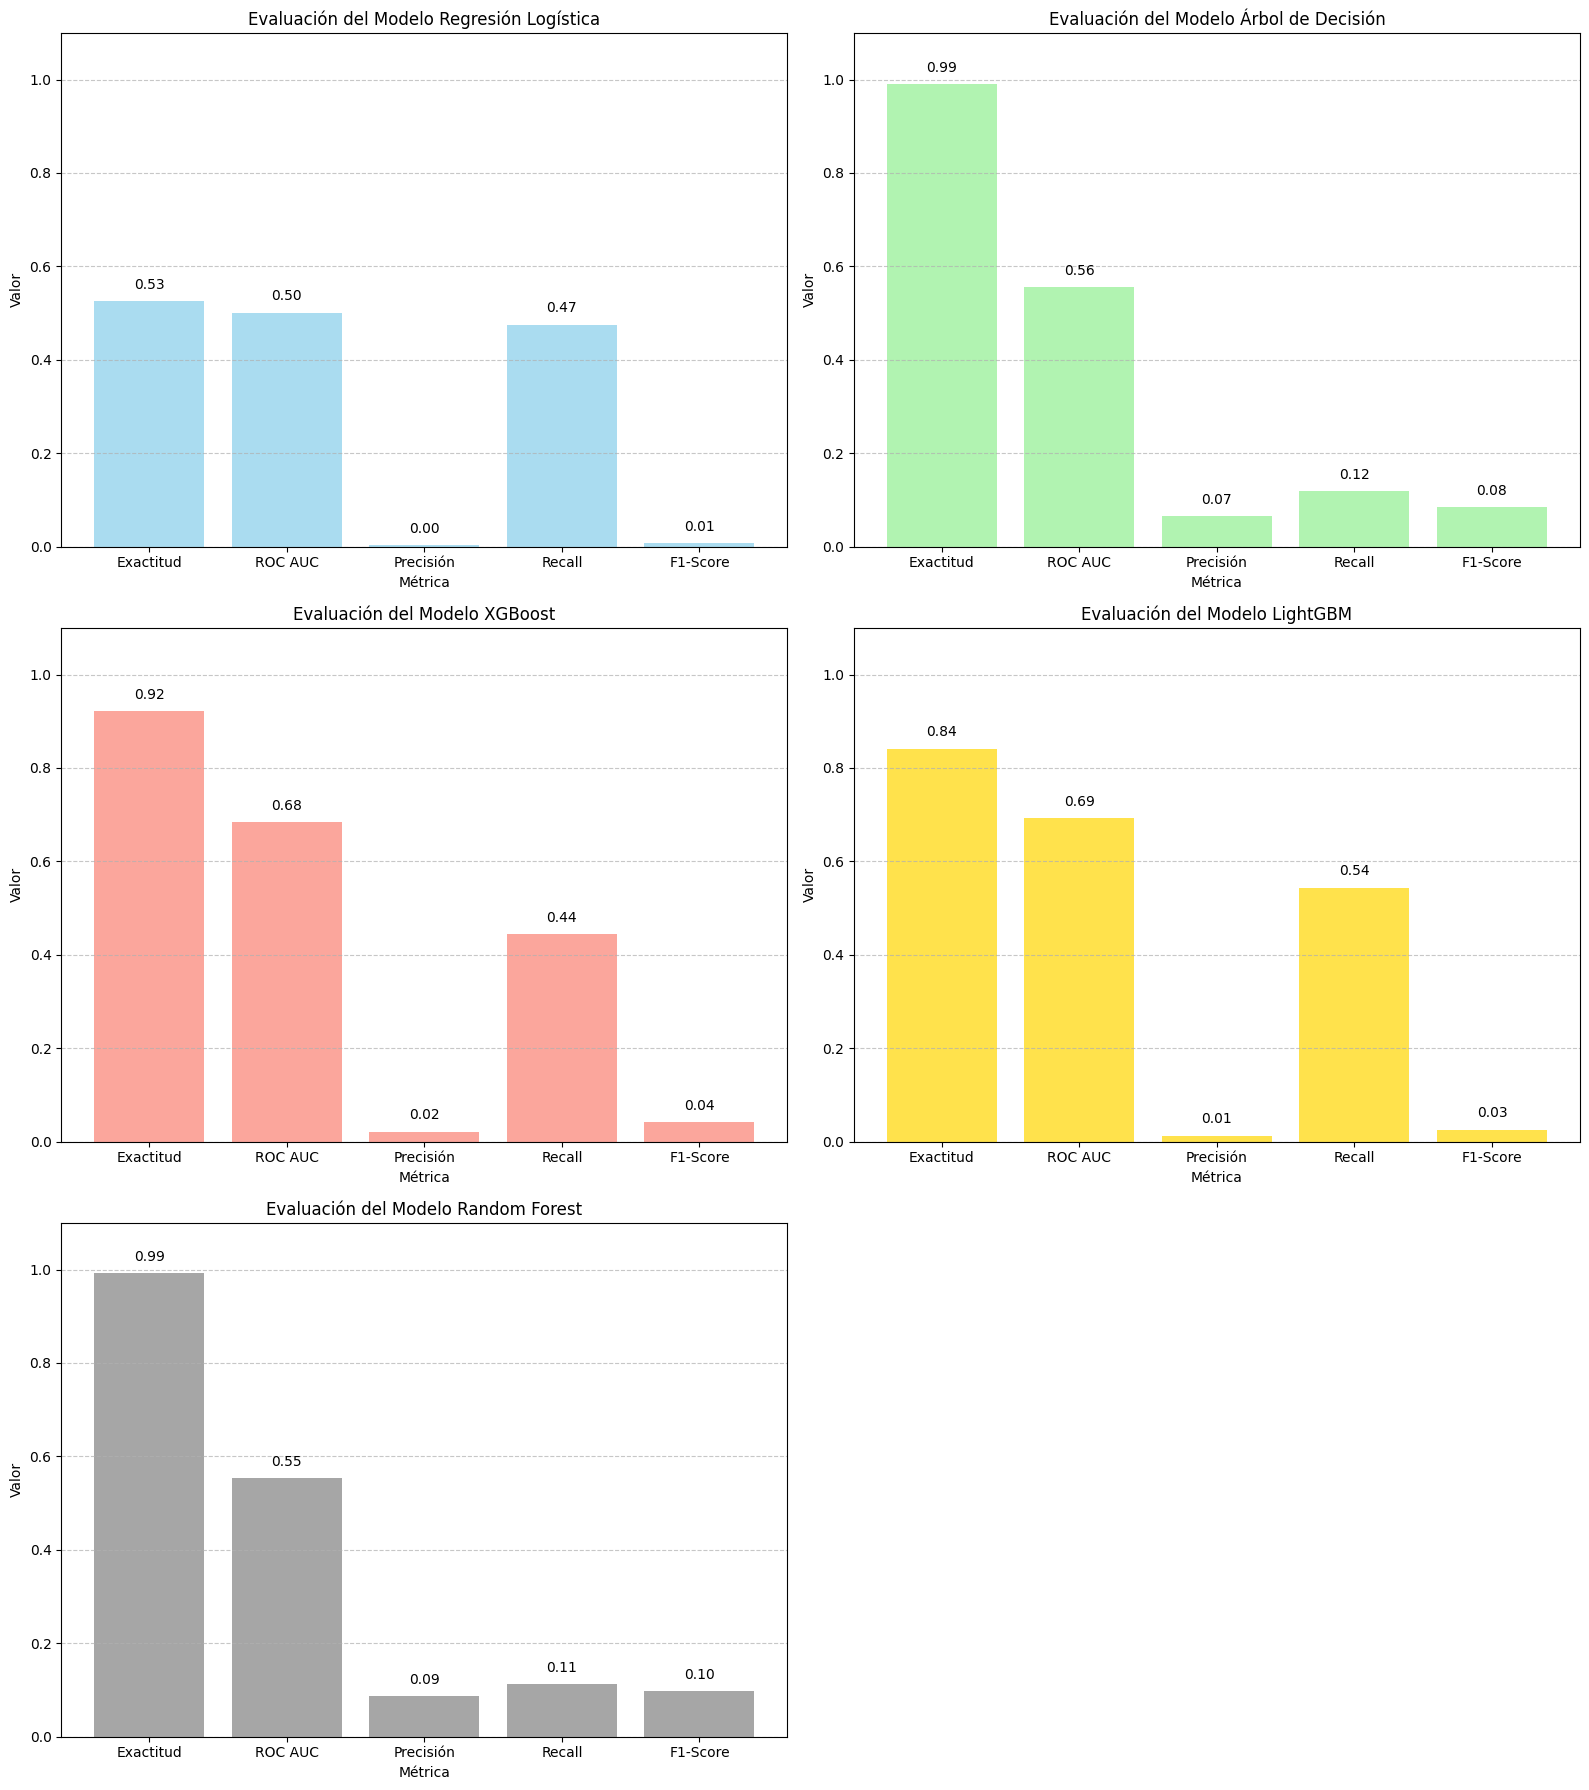

In [54]:
# Función para calcular métricas y crear gráfico para un modelo
def plot_model_metrics(ax, model_name, y_test, y_pred, color_map):
    # Calcular las métricas para el modelo
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Crear un DataFrame para facilitar la visualización
    metrics_df = pd.DataFrame({
        'Métrica': ['Exactitud', 'ROC AUC', 'Precisión', 'Recall', 'F1-Score'],
        'Valor': [accuracy, roc_auc, precision, recall, f1]
    })

    # Crear el gráfico en el eje proporcionado
    bars = ax.bar(metrics_df['Métrica'], metrics_df['Valor'], color=color_map, alpha=0.7)

    # Añadir los valores encima de las barras
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.2f}',
                ha='center', va='bottom', color='black')

    # Ajustar el gráfico
    ax.set_title(f'Evaluación del Modelo {model_name}')
    ax.set_xlabel('Métrica')
    ax.set_ylabel('Valor')
    ax.set_ylim(0, 1.1)  # Ajustar el límite superior para que los valores se vean claramente
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Crear la figura con subplots
fig, axs = plt.subplots(3, 2, figsize=(16, 18))

# Colores para los gráficos
colors = {
    'Regresión Logística': 'skyblue',
    'Árbol de Decisión': 'lightgreen',
    'XGBoost': 'salmon',
    'LightGBM': 'gold',
    'Random Forest': 'gray'
}

# Supongamos que y_test y las predicciones de cada modelo están definidas
# Evaluación para cada modelo
plot_model_metrics(axs[0, 0], 'Regresión Logística', y_test, y_pred_logistico, colors['Regresión Logística'])
plot_model_metrics(axs[0, 1], 'Árbol de Decisión', y_test, y_pred_arbol, colors['Árbol de Decisión'])
plot_model_metrics(axs[1, 0], 'XGBoost', y_test, y_pred_xgboost, colors['XGBoost'])
plot_model_metrics(axs[1, 1], 'LightGBM', y_test, y_pred_lightgbm, colors['LightGBM'])
plot_model_metrics(axs[2, 0], 'Random Forest', y_test, y_pred_rf, colors['Random Forest'])

# Eliminar el subplot vacío (esquina inferior derecha)
fig.delaxes(axs[2, 1])

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()



Con el gráfico segun las metricas podemos comparar mejor cada uno de los modelos. 

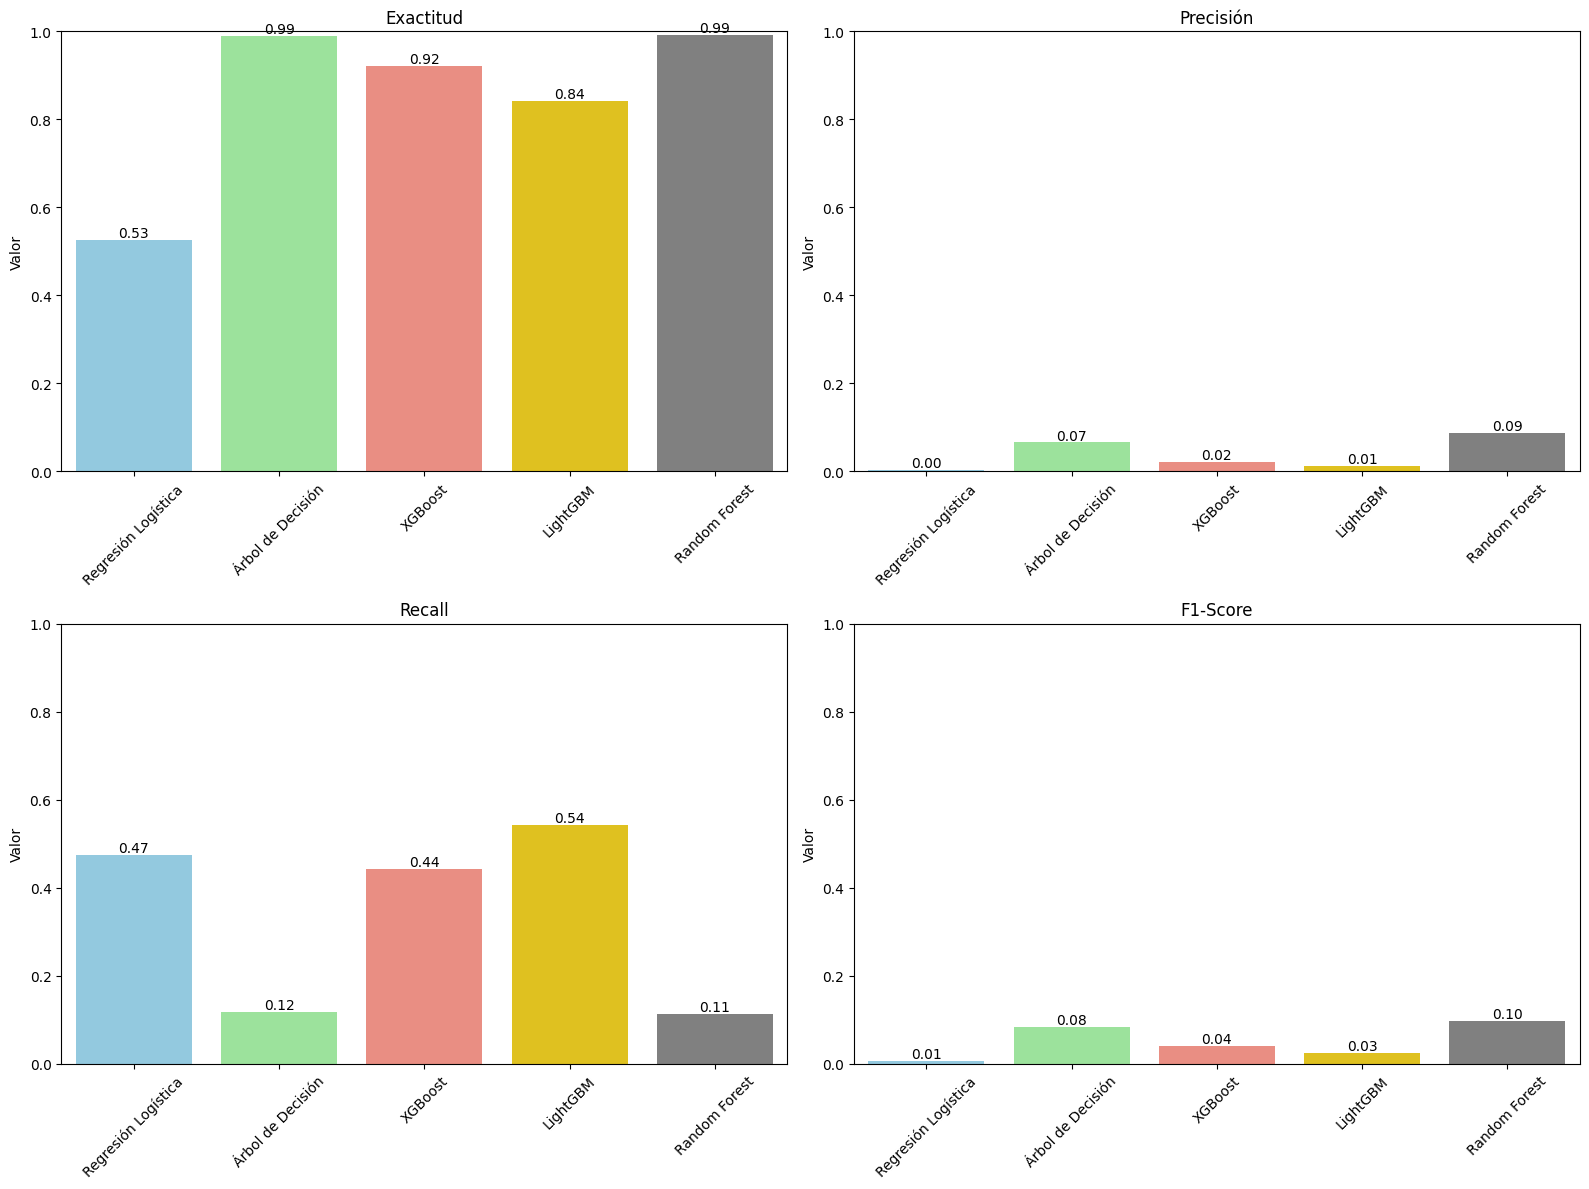

In [55]:
# Definir la función para calcular las métricas
def calculate_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Obtener las métricas para cada modelo
models = {
    "Regresión Logística": modelo_logistico,
    "Árbol de Decisión": arbol_decision,
    "XGBoost": modelo_xgboost,
    "LightGBM": modelo_lightgbm,
    "Random Forest": modelo_rfc  # Agregar Random Forest
}

metrics = {}
for model_name, model in models.items():
    metrics[model_name] = calculate_metrics(model, X_test, y_test)

# Convertir las métricas en listas para graficar
model_names = list(metrics.keys())
metrics_df = pd.DataFrame({
    'Modelo': model_names,
    'Exactitud': [metrics[name][0] for name in model_names],
    'Precisión': [metrics[name][1] for name in model_names],
    'Recall': [metrics[name][2] for name in model_names],
    'F1-Score': [metrics[name][3] for name in model_names]
})

# Configuración de colores
color_map = {
    'Regresión Logística': 'skyblue',
    'Árbol de Decisión': 'lightgreen',
    'XGBoost': 'salmon',
    'LightGBM': 'gold',
    'Random Forest': 'gray'  # Color para Random Forest
}

# Crear la figura con subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Nombres de las métricas para los gráficos
metrics_names = ['Exactitud', 'Precisión', 'Recall', 'F1-Score']

# Graficar cada métrica
for i, metric in enumerate(metrics_names):
    ax = axs[i // 2, i % 2]
    sns.barplot(data=metrics_df, x='Modelo', y=metric, ax=ax, palette=color_map)
    ax.set_title(metric)
    ax.set_xlabel('')
    ax.set_ylabel('Valor')
    ax.set_ylim(0, 1)
    ax.tick_params(axis='x', rotation=45)
    # Añadir los valores encima de las barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()


**Curva ROC para cada modelo**

Este gráfico muestra las curvas ROC para los 5 modelos de clasificación, permitiendo comparar su rendimiento en términos de discriminación entre clases positivas y negativas. La Curva ROC representa la Tasa de Verdaderos Positivos (TPR) frente a la Tasa de Falsos Positivos (FPR) a varios umbrales de decisión.

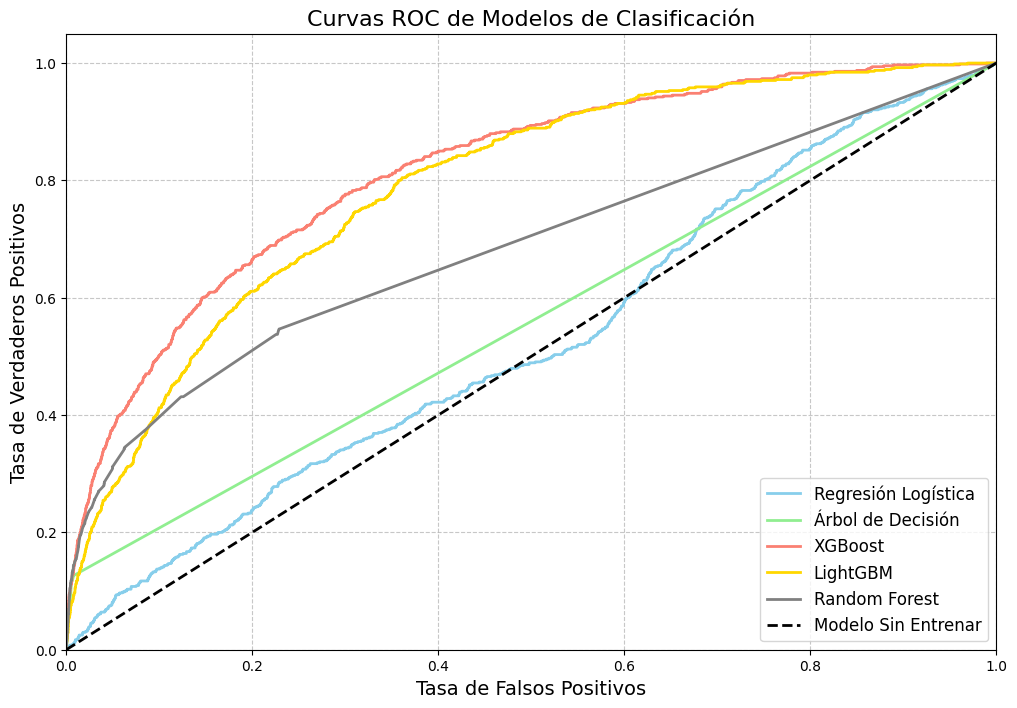

In [56]:
# Calcular las probabilidades de predicción para el conjunto de prueba
probs_logistico = modelo_logistico.predict_proba(X_test)[:, 1]
probs_arbol = arbol_decision.predict_proba(X_test)[:, 1]
probs_xgboost = modelo_xgboost.predict_proba(X_test)[:, 1]
probs_lightgbm = modelo_lightgbm.predict_proba(X_test)[:, 1]
probs_rfc = modelo_rfc.predict_proba(X_test)[:, 1]

# Probabilidades para el modelo sin entrenar (baseline)
probs_baseline = np.full_like(y_test, 0.5)

# Calcular el ROC-AUC para cada modelo
roc_auc_logistico = roc_auc_score(y_test, probs_logistico)
roc_auc_arbol = roc_auc_score(y_test, probs_arbol)
roc_auc_xgboost = roc_auc_score(y_test, probs_xgboost)
roc_auc_lightgbm = roc_auc_score(y_test, probs_lightgbm)
roc_auc_rfc = roc_auc_score(y_test, probs_rfc)
roc_auc_baseline = roc_auc_score(y_test, probs_baseline)


# Graficar la curva ROC para cada modelo
plt.figure(figsize=(12, 8))

fpr_logistico, tpr_logistico, _ = roc_curve(y_test, probs_logistico)
fpr_arbol, tpr_arbol, _ = roc_curve(y_test, probs_arbol)
fpr_xgboost, tpr_xgboost, _ = roc_curve(y_test, probs_xgboost)
fpr_lightgbm, tpr_lightgbm, _ = roc_curve(y_test, probs_lightgbm)
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, probs_rfc)
fpr_baseline, tpr_baseline, _ = roc_curve(y_test, probs_baseline)

# Colores personalizados
colors = {
    'logistico': 'skyblue',  # Azul
    'arbol': 'lightgreen',   # Verde
    'xgboost': 'Salmon',     # Salmón
    'lightgbm': 'Gold',      # Amarillo
    'Random Forest': 'gray', # gris
    'baseline': 'black'      # negro
}

plt.plot(fpr_logistico, tpr_logistico, color=colors['logistico'], label=f'Regresión Logística', linewidth=2)
plt.plot(fpr_arbol, tpr_arbol, color=colors['arbol'], label=f'Árbol de Decisión', linewidth=2)
plt.plot(fpr_xgboost, tpr_xgboost, color=colors['xgboost'], label=f'XGBoost', linewidth=2)
plt.plot(fpr_lightgbm, tpr_lightgbm, color=colors['lightgbm'], label=f'LightGBM', linewidth=2)
plt.plot(fpr_rfc, tpr_rfc, color=colors['Random Forest'], label=f'Random Forest', linewidth=2)
plt.plot(fpr_baseline, tpr_baseline, color=colors['baseline'], label=f'Modelo Sin Entrenar', linewidth=2, linestyle='--')

plt.xlabel('Tasa de Falsos Positivos', fontsize=14)
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=14)
plt.title('Curvas ROC de Modelos de Clasificación', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar los límites de los ejes para una mejor visualización
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.show()


Según el gráfico de la curva ROC, todos los modelos superan la línea diagonal (moodelo sin entrenar) que representa una clasificación aleatoria. Podemos decir entonces que todos los modelos tienen cierta capacidad para distinguir entre las clases, destacandose los modelos XGBoost y LightGBM.


En base a los datos obtenidos, nos enfocaremos en los modelos de XGBoost y Random Forest para los siguientes pasos.

#### 1. Análisis de XGBoost

In [57]:
# Definir una función para trazar la curva ROC para un modelo dado
def plot_roc_curve(model, X_test, y_test, model_name, color, ax):
    # Calcular las probabilidades de predicción para la clase positiva
    probs = model.predict_proba(X_test)[:, 1]
    
    # Calcular el puntaje AUC
    auc = roc_auc_score(y_test, probs)
    
    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test, probs)
    
    # Plot de la curva ROC
    ax.plot(fpr, tpr, color=color, marker='.', label=f'{model_name} (AUC = {auc:.3f})')
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Sin Entrenar')
    ax.set_xlabel('Tasa de Falsos Positivos')
    ax.set_ylabel('Tasa de Verdaderos Positivos')
    ax.set_title(f'Curva ROC para {model_name}')
    ax.legend(loc='lower right')
    ax.grid(True)

In [58]:
# Definir una función para trazar la curva PRC para un modelo dado
def plot_prc_curve(model, X_test, y_test, model_name, color, ax):
    # Calcular las probabilidades de predicción para la clase positiva
    probs = model.predict_proba(X_test)[:, 1]

    # Calcular la curva PRC
    precision, recall, _ = precision_recall_curve(y_test, probs)

    # Calcular el puntaje AUC
    auc_prc = auc(recall, precision)

    # Plot de la curva PRC
    ax.plot(recall, precision, color=color, marker='.', label=f'{model_name} (AUC = {auc_prc:.3f})')
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precisión')
    ax.set_title(f'Curva PRC para {model_name}')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)  # Añadir cuadrícula con líneas discontinuas

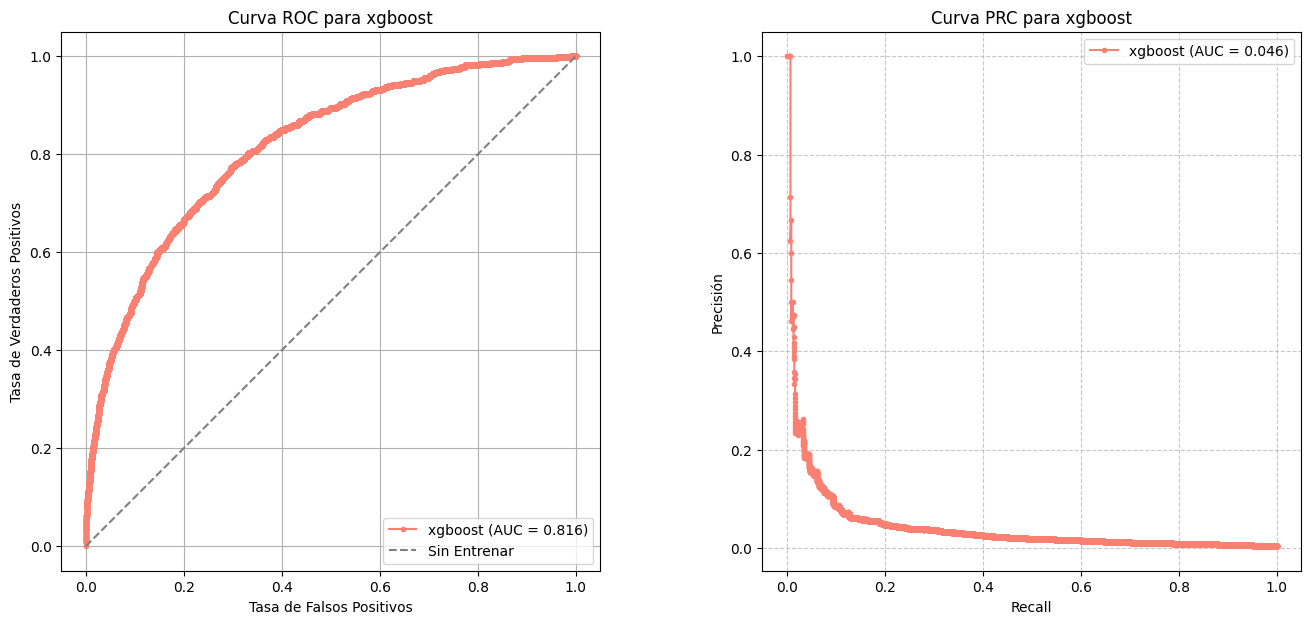

In [59]:
# Definir colores para el modelo
colors = {
        "xgboost": 'Salmon'     # Salmón
}

# Crear una figura con 1x2 subplots para las curvas ROC y PRC del Árbol de Decisión
fig, axs = plt.subplots(1, 2, figsize=(16, 7))

# Graficar la curva ROC para el Árbol de Decisión
plot_roc_curve(modelo_xgboost, X_test, y_test, "xgboost", colors["xgboost"], axs[0])

# Graficar la curva PRC para el Árbol de Decisión
plot_prc_curve(modelo_xgboost, X_test, y_test, "xgboost", colors["xgboost"], axs[1])

# Ajustar el espaciado entre gráficos
plt.subplots_adjust(wspace=0.3)

# Mostrar el gráfico
plt.show()


Buen rendimiento general.El modelo XGBoost muestra un buen rendimiento general según lo indicado por la curva ROC.
Posibles problemas con la clasificación de la clase positiva, la curva PRC sugiere que el modelo podría tener dificultades para identificar correctamente las instancias positivas, especialmente cuando se busca un alto recall.

**Identificar los falsos positivos y falsos negativos**

In [32]:
# Asegúrate de que y_test y y_pred_xgboost tienen la misma longitud
assert len(y_test) == len(y_pred_xgboost), "Las longitudes de y_test y y_pred_xgboost no coinciden."

# Convertir las predicciones de probabilidad a etiquetas binarias (umbral 0.5)
y_pred_bin_xgboost = (y_pred_xgboost >= 0.5).astype(int)

# Crear un DataFrame con las predicciones y las etiquetas verdaderas
df_errores_xgboost = pd.DataFrame({
    'y_true': y_test.values.flatten(),  # Asegúrate de que sea un array 1D
    'y_pred': y_pred_bin_xgboost,
    'probabilidad_fraude': y_pred_xgboost
})

# Identificar falsos positivos y falsos negativos
falsos_positivos_xgboost = df_errores_xgboost[(df_errores_xgboost['y_true'] == 0) & (df_errores_xgboost['y_pred'] == 1)]
falsos_negativos_xgboost = df_errores_xgboost[(df_errores_xgboost['y_true'] == 1) & (df_errores_xgboost['y_pred'] == 0)]

# Mostrar los resultados
print(f"Falsos positivos (XGBoost): {len(falsos_positivos_xgboost)}")
print(f"Falsos negativos (XGBoost): {len(falsos_negativos_xgboost)}")

# Opcional: Analizar ejemplos específicos de falsos positivos y falsos negativos
print("\nEjemplos de Falsos Positivos:")
print(falsos_positivos_xgboost.head())

print("\nEjemplos de Falsos Negativos:")
print(falsos_negativos_xgboost.head())


Falsos positivos (XGBoost): 12206
Falsos negativos (XGBoost): 354

Ejemplos de Falsos Positivos:
    y_true  y_pred  probabilidad_fraude
2        0       1                    1
4        0       1                    1
14       0       1                    1
32       0       1                    1
36       0       1                    1

Ejemplos de Falsos Negativos:
      y_true  y_pred  probabilidad_fraude
485        1       0                    0
1809       1       0                    0
2091       1       0                    0
2169       1       0                    0
2218       1       0                    0


**Optimización de XGBoost**

In [33]:
# Definir el modelo
modelo_xgboost = xgb.XGBClassifier()

# Definir el espacio de hiperparámetros
parametros = {
    'n_estimators': [100, 150],  # Menor rango
    'max_depth': [3, 5],  # Menor rango
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=modelo_xgboost, param_grid=parametros, 
                           scoring='roc_auc', cv=3, verbose=1, n_jobs=-1)

# Ajustar GridSearchCV
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Mejor modelo
modelo_xgboost_optimo = grid_search.best_estimator_


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Mejores hiperparámetros encontrados:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}


In [34]:
# Inicializar los modelos
modelo_xgboost = xgb.XGBClassifier()


# Crear el clasificador de ensamblado
modelo_ensamblado = VotingClassifier(estimators=[
    ('xgb', modelo_xgboost)
], voting='soft')

# Entrenar el modelo ensamblado
modelo_ensamblado.fit(X_train, y_train)

# Predicciones con el modelo ensamblado
y_pred_ensamblado = modelo_ensamblado.predict(X_test)

# Evaluar el modelo ensamblado
print("\n===== Informe de Evaluación del Modelo Ensamblado =====")
print("Exactitud:", accuracy_score(y_test, y_pred_ensamblado))
print("ROC AUC:", roc_auc_score(y_test, y_pred_ensamblado))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_ensamblado))



===== Informe de Evaluación del Modelo Ensamblado =====
Exactitud: 0.9246622999592121
ROC AUC: 0.6866892642525109

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    166076
           1       0.02      0.45      0.04       640

    accuracy                           0.92    166716
   macro avg       0.51      0.69      0.50    166716
weighted avg       0.99      0.92      0.96    166716



Graficamos la curva de aprendizaje

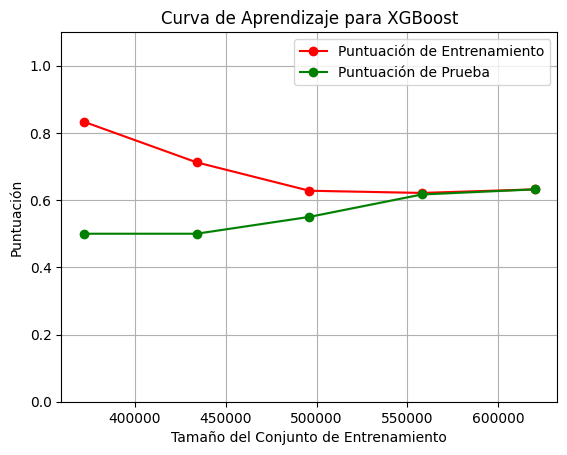

In [ ]:
# Definir una función para graficar la curva de aprendizaje
def graficar_curva_aprendizaje(modelo, X, y, nombre_modelo):
    # Calcular las curvas de aprendizaje
    train_sizes, train_scores, test_scores = learning_curve(
        modelo, X, y, cv=5, scoring=make_scorer(accuracy_score), n_jobs=-1, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    )

    # Calcular la media y desviación estándar de las puntuaciones de entrenamiento y prueba
    train_scores_mean = train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = test_scores.mean(axis=1)
    test_scores_std = test_scores.std(axis=1)

    # Graficar la curva de aprendizaje
    plt.figure()
    plt.title(f"Curva de Aprendizaje para {nombre_modelo}")
    plt.xlabel("Tamaño del Conjunto de Entrenamiento")
    plt.ylabel("Puntuación")
    plt.ylim(0, 1.1)
    plt.grid()

    # Curva de aprendizaje de entrenamiento
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Puntuación de Entrenamiento")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")

    # Curva de aprendizaje de prueba
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Puntuación de Prueba")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.legend(loc="best")
    plt.show()

# Graficar la curva de aprendizaje para el modelo XGBoost
graficar_curva_aprendizaje(modelo_xgboost, X_train, y_train, "XGBoost")


La puntuación de entrenamiento comienza alta y disminuye ligeramente a medida que aumenta el tamaño del conjunto. Esto sugiere que el modelo está aprendiendo los patrones en los datos de entrenamiento de manera efectiva.
Sin embargo, la puntuación de prueba comienza baja y aumenta hasta alcanzar un punto de estabilidad. Esto indica que el modelo inicialmente estaba subajustado (no aprendía los patrones suficientes) y luego mejora su capacidad de generalización.
A partir de un cierto tamaño de conjunto de entrenamiento (alrededor de 550,000), ambas curvas se estabilizan. Esto sugiere que agregar más datos de entrenamiento no mejora significativamente el rendimiento del modelo. Se ha alcanzado un punto de saturación.

#### 2. Análisis del Random Forest

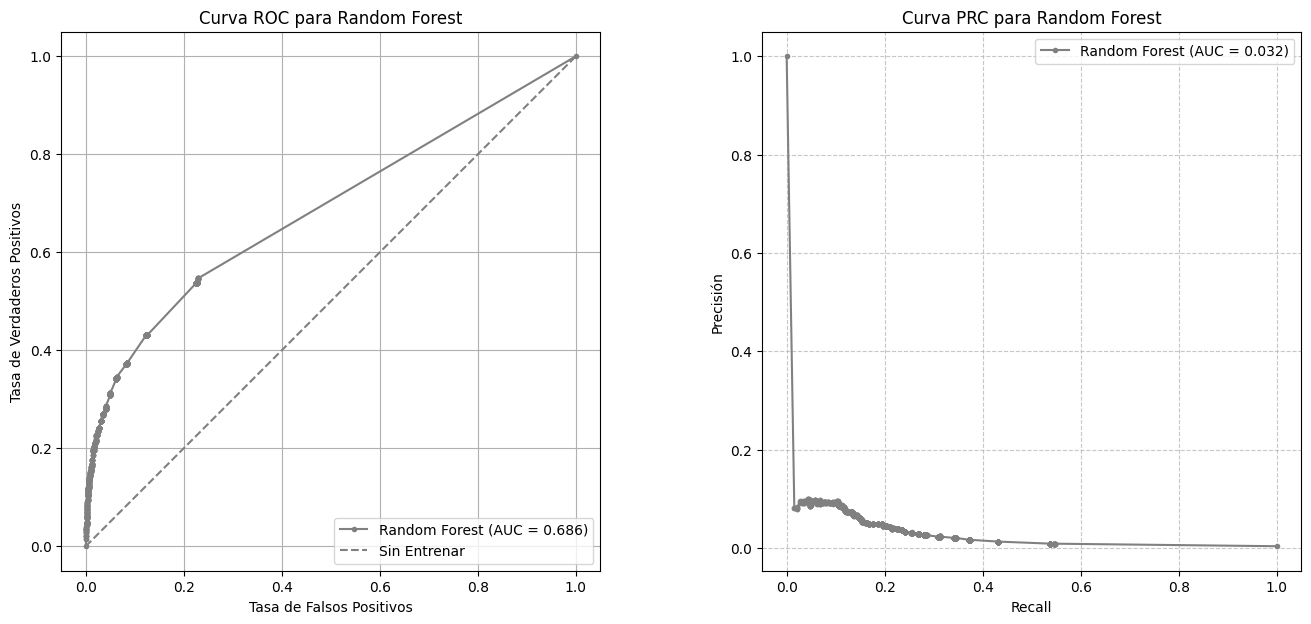

In [65]:
# Definir colores para el modelo
colors = {
    "Random Forest": 'gray'
}

# Crear una figura con 1x2 subplots para las curvas ROC y PRC de Random Forest
fig, axs = plt.subplots(1, 2, figsize=(16, 7))

# Graficar la curva ROC para Random Forest
plot_roc_curve(modelo_rfc, X_test, y_test, "Random Forest", colors["Random Forest"], axs[0])

# Graficar la curva PRC para Random Forest
plot_prc_curve(modelo_rfc, X_test, y_test, "Random Forest", colors["Random Forest"], axs[1])

# Ajustar el espaciado entre gráficos
plt.subplots_adjust(wspace=0.3)

# Mostrar el gráfico
plt.show()

El modelo de Random Forest muestra un buen desempeño general, con un AUC elevado en ambas curvas (ROC y PRC), lo que indica una capacidad sólida para clasificar correctamente. La curva PRC destaca una alta precisión, lo que sugiere que cuando el modelo predice una clase positiva, es muy probable que acierte. Sin embargo, la caída rápida en la precisión conforme aumenta el recall podría señalar un desequilibrio en las clases, donde la clase positiva es mucho menos frecuente que la negativa.

**Identificar los falsos positivos y falsos negativos**

In [70]:
# Asegúrate de que y_test y y_pred_rf tienen la misma longitud
assert len(y_test) == len(y_pred_rf), "Las longitudes de y_test y y_pred_rf no coinciden."

# Convertir las predicciones de probabilidad a etiquetas binarias (umbral 0.5)
y_pred_bin_rfc = (y_pred_rf >= 0.5).astype(int)

# Crear un DataFrame con las predicciones y las etiquetas verdaderas
df_errores_rfc = pd.DataFrame({
    'y_true': y_test.values.flatten(),  # Asegúrate de que sea un array 1D
    'y_pred': y_pred_bin_rfc,
    'probabilidad_fraude': y_pred_rf
})

# Identificar falsos positivos y falsos negativos
falsos_positivos_rfc = df_errores_rfc[(df_errores_rfc['y_true'] == 0) & (df_errores_rfc['y_pred'] == 1)]
falsos_negativos_rfc = df_errores_rfc[(df_errores_rfc['y_true'] == 1) & (df_errores_rfc['y_pred'] == 0)]

# Mostrar los resultados
print(f"Falsos positivos (Random Forest): {len(falsos_positivos_rfc)}")
print(f"Falsos negativos (Random Forest): {len(falsos_negativos_rfc)}")

# Opcional: Analizar ejemplos específicos de falsos positivos y falsos negativos
print("\nEjemplos de Falsos Positivos:")
print(falsos_positivos_rfc.head())

print("\nEjemplos de Falsos Negativos:")
print(falsos_negativos_rfc.head())

Falsos positivos (Random Forest): 761
Falsos negativos (Random Forest): 568

Ejemplos de Falsos Positivos:
     y_true  y_pred  probabilidad_fraude
332       0       1                    1
499       0       1                    1
691       0       1                    1
778       0       1                    1
924       0       1                    1

Ejemplos de Falsos Negativos:
      y_true  y_pred  probabilidad_fraude
485        1       0                    0
882        1       0                    0
1216       1       0                    0
1809       1       0                    0
2091       1       0                    0


Entrenar el modelo con OOB activado

In [72]:
# Crear el modelo con OOB activado
modelo_rfc_oob = RandomForestClassifier(oob_score=True, random_state=42)

# Entrenar el modelo con los datos balanceados y normalizados
modelo_rfc_oob.fit(X_train, y_train)

# Obtener el Out-of-Bag error
oob_error = 1 - modelo_rfc_oob.oob_score_
print("OOB Error:", oob_error)

OOB Error: 0.0035935669345390497


**Evaluar el rendimiento del modelo usando el conjunto de prueba**

In [73]:
# Realizar predicciones en el conjunto de prueba
y_pred_rfc_oob = modelo_rfc_oob.predict(X_test)

# Evaluación del modelo Random Forest optimizado con OOB
print("\n===== Informe de Evaluación del Modelo Random Forest con OOB =====")
print("Exactitud (Accuracy):", accuracy_score(y_test, y_pred_rfc_oob))
print("ROC AUC:", roc_auc_score(y_test, y_pred_rfc_oob))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred_rfc_oob))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rfc_oob))
print("\nMétricas adicionales:")
print("Precisión (Precision):", precision_score(y_test, y_pred_rfc_oob))
print("Recall:", recall_score(y_test, y_pred_rfc_oob))
print("F1-score:", f1_score(y_test, y_pred_rfc_oob))



===== Informe de Evaluación del Modelo Random Forest con OOB =====
Exactitud (Accuracy): 0.9918904004414694
ROC AUC: 0.5515549168754065

Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166076
           1       0.08      0.11      0.09       640

    accuracy                           0.99    166716
   macro avg       0.54      0.55      0.54    166716
weighted avg       0.99      0.99      0.99    166716


Matriz de Confusión:
[[165295    781]
 [   571     69]]

Métricas adicionales:
Precisión (Precision): 0.0811764705882353
Recall: 0.1078125
F1-score: 0.09261744966442953


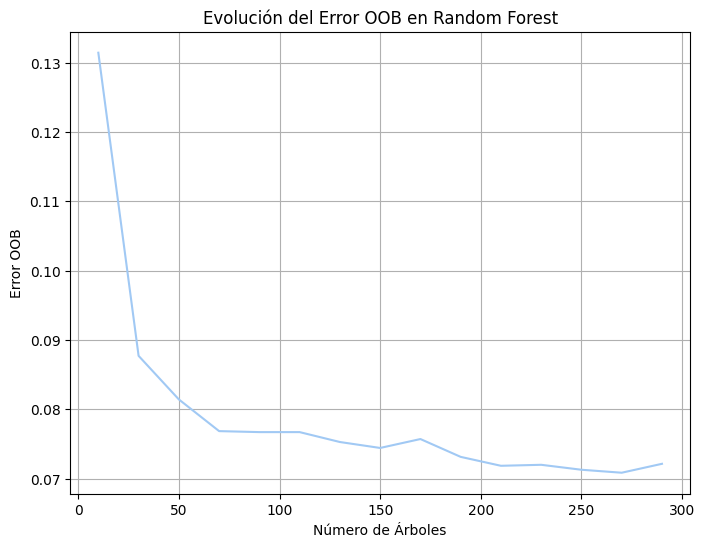

In [78]:
from sklearn.datasets import make_classification

# Generar datos de ejemplo
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar el Random Forest con OOB y configuraciones para optimización
rf_oob = RandomForestClassifier(oob_score=True, warm_start=True, n_jobs=-1, random_state=42, 
                                max_depth=10, min_samples_leaf=5, max_features='sqrt', max_samples=0.8)

oob_errors = []

# Entrenar el modelo agregando árboles progresivamente
for n_trees in range(10, 301, 20):  # Incrementar el número de árboles en intervalos de 20
    rf_oob.set_params(n_estimators=n_trees)
    rf_oob.fit(X_train, y_train)
    oob_errors.append(1 - rf_oob.oob_score_)

# Graficar el error OOB
plt.figure(figsize=(8, 6))
plt.plot(range(10, 301, 20), oob_errors, label="Error OOB")
plt.xlabel('Número de Árboles')
plt.ylabel('Error OOB')
plt.title('Evolución del Error OOB en Random Forest')
plt.grid()
plt.show()


#### Matriz de Confusión para ambos modelos

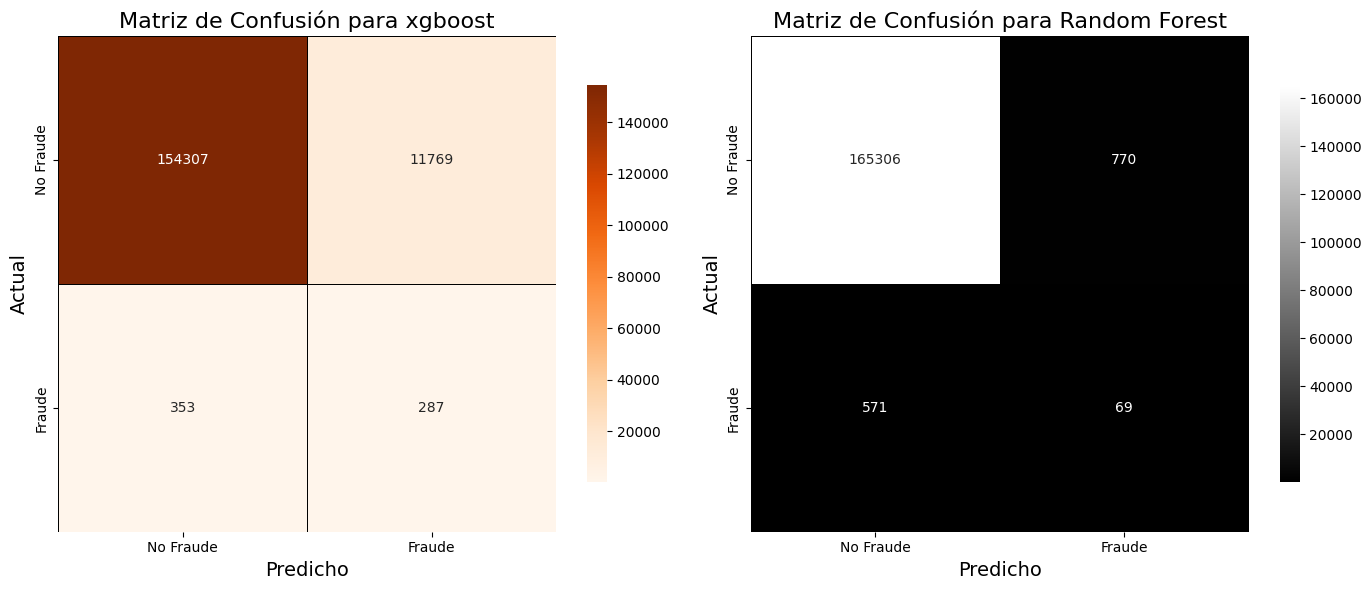

In [ ]:
def plot_confusion_matrix(model, X_test, y_test, model_name, ax, color):
    # Predecir etiquetas
    y_pred = model.predict(X_test)

    # Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)

    # Plot de la matriz de confusión usando seaborn heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap=color, ax=ax,
                xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'],
                cbar=True, cbar_kws={'shrink': 0.8}, linewidths=0.5, linecolor='black')

    ax.set_title(f'Matriz de Confusión para {model_name}', fontsize=16)
    ax.set_xlabel('Predicho', fontsize=14)
    ax.set_ylabel('Actual', fontsize=14)

    # Ajustar estilo del gráfico
    ax.set_facecolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')

# Crear una figura con 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Colores personalizados para cada matriz de confusión
colors = {
    "xgboost": 'Oranges',     # Salmón
    "Random Forest": 'gray'
}

# Graficar la matriz de confusión para cada modelo en subplots separados
plot_confusion_matrix(modelo_xgboost, X_test, y_test, "xgboost", axs[0], colors['xgboost'])
plot_confusion_matrix(modelo_rfc, X_test, y_test, "Random Forest", axs[1], colors['Random Forest'])

# Ajustar el espaciado entre gráficos
plt.tight_layout()
plt.show()



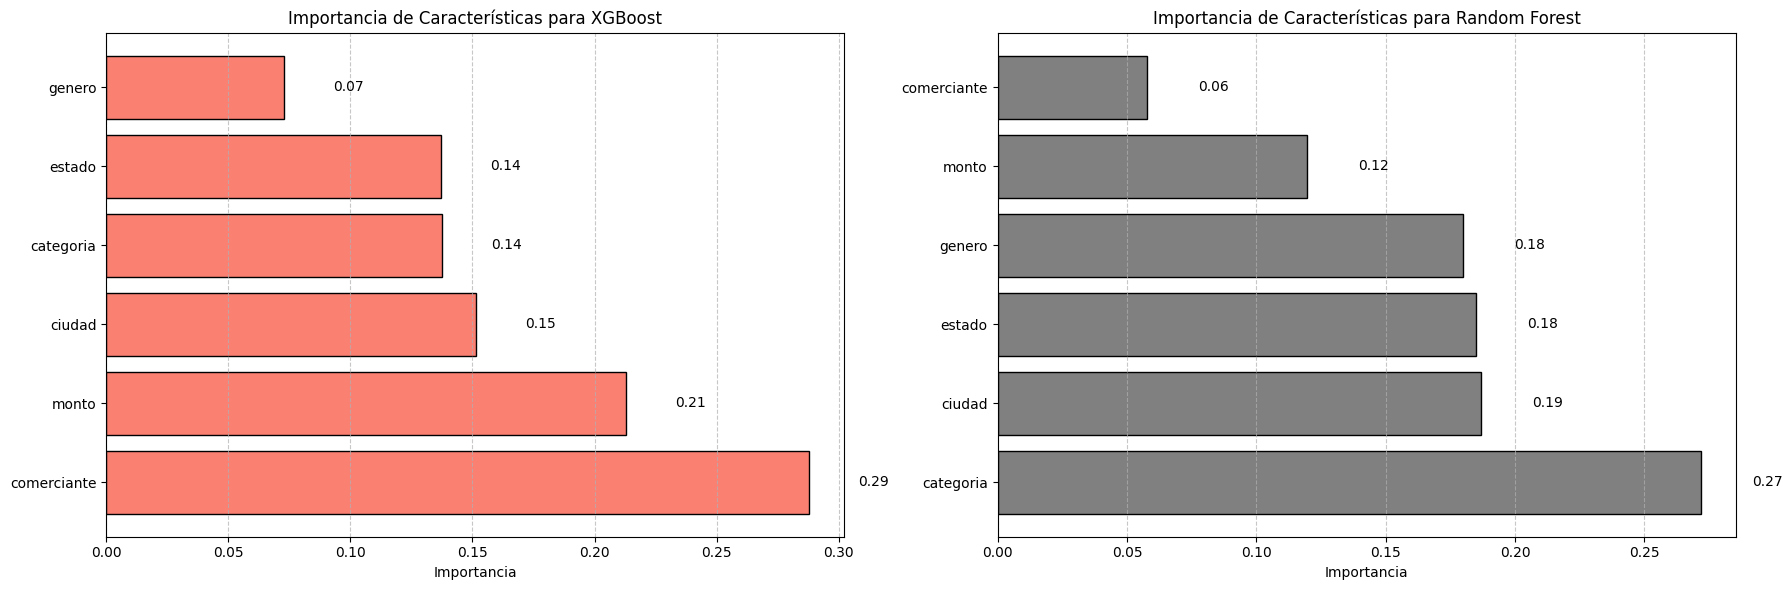

In [66]:
# Definir colores para cada modelo
colores = {
    "XGBoost": 'salmon',
    "Random Forest": 'gray'
}

# Definir nombres de características basados en las columnas del DataFrame df_fraude
feature_names = ['comerciante', 'categoria', 'monto', 'genero', 'ciudad', 'estado', 'trabajo', 'trans_hora_agrupado', 'trans_mes']



# Función para trazar la importancia de características para XGBoost
def plot_xgboost_importances(model, feature_names, ax):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    sorted_importances = importances[indices]
    sorted_feature_names = np.array(feature_names)[indices]
    bars = ax.barh(sorted_feature_names, sorted_importances, color=colores['XGBoost'], edgecolor='black')
    ax.set_xlabel('Importancia')
    ax.set_title('Importancia de Características para XGBoost')
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.02, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center', ha='left', color='black', fontsize=10)

# Función para trazar la importancia de características para Random Forest
def plot_rfc_importances(model, feature_names, ax):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    sorted_importances = importances[indices]
    sorted_feature_names = np.array(feature_names)[indices]
    bars = ax.barh(sorted_feature_names, sorted_importances, color=colores['Random Forest'], edgecolor='black')
    ax.set_xlabel('Importancia')
    ax.set_title('Importancia de Características para Random Forest')
    ax.grid(axis='x', linestyle='--', alpha=0.7)
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.02, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center', ha='left', color='black', fontsize=10)

# Crear subplots de 1x2
fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # 1 fila, 2 columnas

# Graficar la importancia de características para cada modelo en subplots separados
plot_xgboost_importances(modelo_xgboost, feature_names, axs[0])  # Primer subplot
plot_rfc_importances(modelo_rfc, feature_names, axs[1])  # Segundo subplot

# Ajustar el layout para añadir más espacio entre los gráficos
plt.subplots_adjust(wspace=0.3, hspace=0.4)  # Ajuste de espacio horizontal y vertical

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()


### Conclusión




Random Forest no es tan efectivo como otros modelos para la detección de fraudes a pesar de su alta exactitud general. La baja precisión y recall para la clase de fraude indican que el modelo tiene dificultades para identificar los casos de fraude de manera efectiva.

Modelos como XGBoost y LightGBM ofrecen un mejor equilibrio entre precisión y recall para la clase de fraude, a pesar de tener una exactitud general más baja.

Árbol de Decisión también muestra un buen desempeño general, aunque es menos robusto en la detección de fraudes en comparación con XGBoost y LightGBM.

Por otro lado, la curva de aprendizaje sugiere que el modelo XGBoost está funcionando razonablemente bien, pero hay margen de mejora. Ajustar los hiperparámetros y analizar la calidad de los datos son pasos importantes para optimizar el modelo.